<a href="https://colab.research.google.com/github/clferreira1985/Projetos_Python/blob/main/Hotel_Reservations_Dataset/Hotel_Reservations_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prevendo cancelamentos de hotéis

## 1º Problema de Negócio

Precisamos identificar o que contribui para que a reserva seja atendida ou cancelada. Aproveitar o resultado e reduzir a chance de alguém cancelar a reserva



### Os dados

###### Eles forneceram a você os dados de suas reservas em um arquivo chamado hotel_bookings.csv, que contém o seguinte:

###### Coluna ---> Descrição
###### Booking_ID ---> Identificador único da reserva.
###### no_of_adults ---> O número de adultos.
###### no_of_children ---> O número de filhos.
###### no_of_weekend_nights ---> Número de noites de fim de semana (sábado ou domingo).
###### no_of_week_nights ---> Número de noites da semana (segunda a sexta).
###### type_of_meal_plan ---> Tipo de plano de refeições incluído na reserva.
###### required_car_parking_space ---> Se é necessário um espaço de estacionamento.
###### room_type_reserved ---> O tipo de quarto reservado.
###### lead_time ---> Número de dias antes da data de chegada em que a reserva foi feita.
###### arrival_year ---> Ano de chegada.
###### arrival_month ---> Mês de chegada.
###### arrival_date ---> Data do mês de chegada.
###### market_segment_type ---> Como foi feita a reserva.
###### repeated_guest ---> Se o hóspede já se hospedou anteriormente no hotel.
###### no_of_previous_cancellations ---> Número de cancelamentos anteriores.
###### no_of_previous_bookings_not_canceled ---> Número de reservas anteriores que foram canceladas.
###### avg_price_per_room ---> Preço médio por dia da reserva.
###### no_of_special_requests ---> Contagem de pedidos especiais feitos como parte da reserva.
###### booking_status ---> Se a reserva foi cancelada ou não.

## 2º Análise Exploratória

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing




In [2]:
# Carrega o dataset
df = pd.read_csv('https://raw.githubusercontent.com/clferreira1985/Projetos_Python/main/Hotel_Reservations_Dataset/Hotel%20Reservations.csv')


In [3]:
# Shape
df.shape

(36275, 19)

In [4]:
#Amostra
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [6]:
# Temos valores nulos?
df.isna().any()

Booking_ID                              False
no_of_adults                            False
no_of_children                          False
no_of_weekend_nights                    False
no_of_week_nights                       False
type_of_meal_plan                       False
required_car_parking_space              False
room_type_reserved                      False
lead_time                               False
arrival_year                            False
arrival_month                           False
arrival_date                            False
market_segment_type                     False
repeated_guest                          False
no_of_previous_cancellations            False
no_of_previous_bookings_not_canceled    False
avg_price_per_room                      False
no_of_special_requests                  False
booking_status                          False
dtype: bool

In [7]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

#### Visualizando as Variáveis Categóricas

In [8]:
df.select_dtypes(include='object').drop(columns = 'Booking_ID').head()

,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
0,Meal Plan 1,Room_Type 1,Offline,Not_Canceled
1,Not Selected,Room_Type 1,Online,Not_Canceled
2,Meal Plan 1,Room_Type 1,Online,Canceled
3,Meal Plan 1,Room_Type 1,Online,Canceled
4,Not Selected,Room_Type 1,Online,Canceled


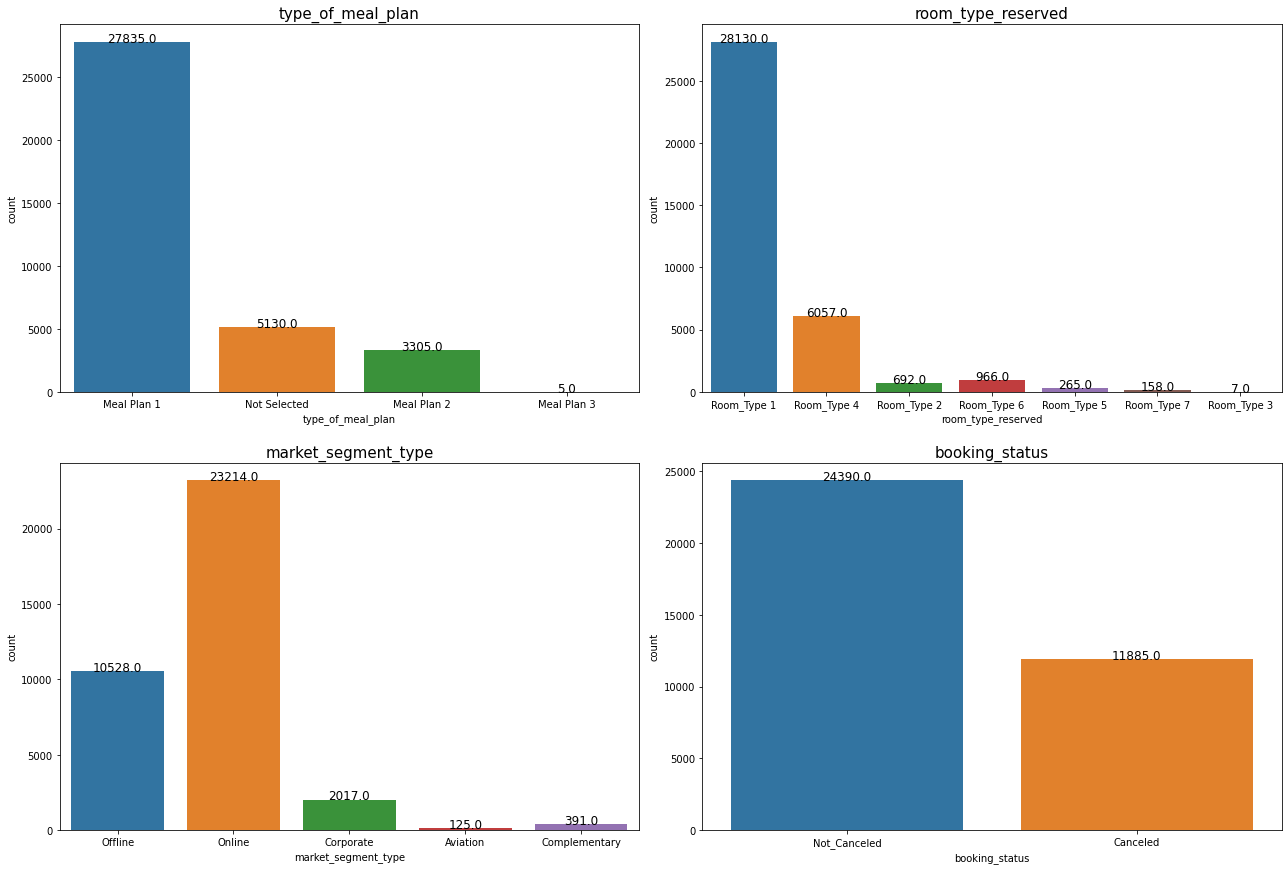

In [9]:
# plot

# Tamanho da figuta
plt.figure(figsize = (18,30))

# Lista de colunas
columns_list = df.select_dtypes(include='object').drop(columns = 'Booking_ID').head()

# Contador
A = 0

for i in columns_list:
  A += 1
  plt.subplot (5, 2, A)
  ax = sns.countplot(data = df.fillna('NaN'), x = i)
  plt.title(i, fontsize = 15)
  for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
  if A >= 7:
    plt.xticks (rotation = 45)  

# Layout

plt.tight_layout(h_pad = 2)

#### Visualizando as Variáveis numericas

In [13]:
df.head(2)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled


In [ ]:
df_col = df.loc[]

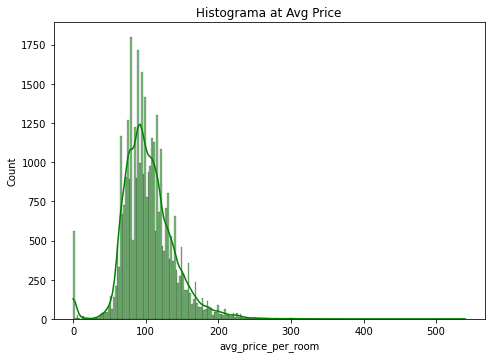

In [23]:
# plot

# Tamanho da figura

plt.figure(figsize = (17, 12))

# subplot com histogramas

plt.subplot(221)
sns.color_palette('hls', 8)
sns.histplot(df['avg_price_per_room'], kde = True, color = "green")
plt.title("Histograma at Avg Price")
plt.show()

In [ ]:
df

## 3º Pré-processamento dos dados


In [10]:
def meal_plan (row):
    if row.type_of_meal_plan == 'Not Selected':
        return 0
    elif row.type_of_meal_plan == 'Meal Plan 1':
        return 1
    elif row.type_of_meal_plan == 'Meal Plan 2':
        return 2
    else:
        return 3

df['type_of_meal_plan'] = df.apply(meal_plan, axis=1)
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,0,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,0,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [11]:
label_encoder = preprocessing.LabelEncoder()
df['market_segment_type'] = label_encoder.fit_transform(df['market_segment_type'])
df['market_segment_type'].value_counts()




4    23214
3    10528
2     2017
1      391
0      125
Name: market_segment_type, dtype: int64

In [12]:
df['booking_status'] = label_encoder.fit_transform(df['booking_status'])
df['booking_status'].value_counts()



1    24390
0    11885
Name: booking_status, dtype: int64

In [13]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,1,0,Room_Type 1,224,2017,10,2,3,0,0,0,65.00,0,1
1,INN00002,2,0,2,3,0,0,Room_Type 1,5,2018,11,6,4,0,0,0,106.68,1,1
2,INN00003,1,0,2,1,1,0,Room_Type 1,1,2018,2,28,4,0,0,0,60.00,0,0
3,INN00004,2,0,0,2,1,0,Room_Type 1,211,2018,5,20,4,0,0,0,100.00,0,0
4,INN00005,2,0,1,1,0,0,Room_Type 1,48,2018,4,11,4,0,0,0,94.50,0,0
